# Clase 5 - Pandas

In [3]:
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv("titanic.csv")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
data.loc[(data["Pclass"]==1), "PassengerId"].count()

216

In [15]:
data.loc[(data["Pclass"]==2), "PassengerId"].count()

184

In [17]:
data.loc[(data["Pclass"]==3), "PassengerId"].count()

491

In [19]:
136/216

0.6296296296296297

In [21]:
87/184

0.47282608695652173

In [23]:
119/491

0.24236252545824846

## Aggregate

In [26]:
data.select_dtypes("number").aggregate(["sum", "min", "max", "var", "mean", "count"])

PassengerId    Survived       Pclass           Age       SibSp  \
sum       397386.0  342.000000  2057.000000  21205.170000  466.000000   
min            1.0    0.000000     1.000000      0.420000    0.000000   
max          891.0    1.000000     3.000000     80.000000    8.000000   
var        66231.0    0.236772     0.699015    211.019125    1.216043   
mean         446.0    0.383838     2.308642     29.699118    0.523008   
count        891.0  891.000000   891.000000    714.000000  891.000000   

            Parch          Fare  
sum    340.000000  28693.949300  
min      0.000000      0.000000  
max      6.000000    512.329200  
var      0.649728   2469.436846  
mean     0.381594     32.204208  
count  891.000000    891.000000

In [28]:
data.select_dtypes("number").aggregate({"Survived": np.sum, "Age": np.mean})

C:\Users\Norman Beltran\AppData\Local\Temp\ipykernel_2548\4123814486.py:1: FutureWarning: The provided callable <function sum at 0x0000029DDD9C5300> is currently using Series.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data.select_dtypes("number").aggregate({"Survived": np.sum, "Age": np.mean})
C:\Users\Norman Beltran\AppData\Local\Temp\ipykernel_2548\4123814486.py:1: FutureWarning: The provided callable <function mean at 0x0000029DDD9C63E0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data.select_dtypes("number").aggregate({"Survived": np.sum, "Age": np.mean})


Survived    342.000000
Age          29.699118
dtype: float64

In [34]:
data.select_dtypes("number").aggregate({"Age": ["sum", "mean"], "Survived": ["sum", "mean"]})

Age    Survived
sum   21205.170000  342.000000
mean     29.699118    0.383838

## value_counts()

In [37]:
df = pd.DataFrame({'num_patas': [2, 4, 4, 6, 4, 2],
                   'num_alas': [2, 0, 0, 0, 0, 2]},
                  index=['halcon', 'perro', 'gato', 'hormiga', 'caballo', 'loro'])

In [39]:
df

num_patas  num_alas
halcon           2         2
perro            4         0
gato             4         0
hormiga          6         0
caballo          4         0
loro             2         2

In [41]:
df.value_counts()

num_patas  num_alas
4          0           3
2          2           2
6          0           1
Name: count, dtype: int64

In [45]:
df.value_counts(normalize=True)

num_patas  num_alas
4          0           0.500000
2          2           0.333333
6          0           0.166667
Name: proportion, dtype: float64

## Group By

In [48]:
data_groupby_sex = data.groupby("Sex")

In [50]:
type(data_groupby_sex)

pandas.core.groupby.generic.DataFrameGroupBy

In [52]:
data_groupby_sex

In [54]:
data.groupby("Sex").count()

PassengerId  Survived  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex                                                                            
female          314       314     314   314  261    314    314     314   314   
male            577       577     577   577  453    577    577     577   577   

        Cabin  Embarked  
Sex                      
female     97       312  
male      107       577

In [58]:
data_groupby_sex.ngroups

2

In [60]:
data_groupby_sex.groups

{'female': [1, 2, 3, 8, 9, 10, 11, 14, 15, 18, 19, 22, 24, 25, 28, 31, 32, 38, 39, 40, 41, 43, 44, 47, 49, 52, 53, 56, 58, 61, 66, 68, 71, 79, 82, 84, 85, 88, 98, 100, 106, 109, 111, 113, 114, 119, 123, 128, 132, 133, 136, 140, 141, 142, 147, 151, 156, 161, 166, 167, 172, 177, 180, 184, 186, 190, 192, 194, 195, 198, 199, 205, 208, 211, 215, 216, 218, 229, 230, 233, 235, 237, 240, 241, 246, 247, 251, 254, 255, 256, 257, 258, 259, 264, 268, 269, 272, 274, 275, 276, ...], 'male': [0, 4, 5, 6, 7, 12, 13, 16, 17, 20, 21, 23, 26, 27, 29, 30, 33, 34, 35, 36, 37, 42, 45, 46, 48, 50, 51, 54, 55, 57, 59, 60, 62, 63, 64, 65, 67, 69, 70, 72, 73, 74, 75, 76, 77, 78, 80, 81, 83, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 101, 102, 103, 104, 105, 107, 108, 110, 112, 115, 116, 117, 118, 120, 121, 122, 124, 125, 126, 127, 129, 130, 131, 134, 135, 137, 138, 139, 143, 144, 145, 146, 148, 149, 150, 152, 153, 154, 155, ...]}

In [62]:
data_groupby_sex.size()

Sex
female    314
male      577
dtype: int64

In [64]:
data.groupby("Pclass").count()

PassengerId  Survived  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Pclass                                                                      
1               216       216   216  216  186    216    216     216   216   
2               184       184   184  184  173    184    184     184   184   
3               491       491   491  491  355    491    491     491   491   

        Cabin  Embarked  
Pclass                   
1         176       214  
2          16       184  
3          12       491

In [68]:
data_groupby_sex.get_group("female").head()

PassengerId  Survived  Pclass  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [78]:
data.groupby("Sex").count()

PassengerId  Survived  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex                                                                            
female          314       314     314   314  261    314    314     314   314   
male            577       577     577   577  453    577    577     577   577   

        Cabin  Embarked  
Sex                      
female     97       312  
male      107       577

In [86]:
data[["Age", "Sex"]].groupby("Sex").mean()

Age
Sex              
female  27.915709
male    30.726645

In [92]:
data.groupby("Sex")["Age"].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [94]:
data.groupby("Sex").Age.mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [96]:
data.groupby("Sex").Age.agg(["max", "min", "mean", "count"])

max   min       mean  count
Sex                                 
female  63.0  0.75  27.915709    261
male    80.0  0.42  30.726645    453

In [100]:
data.groupby("Sex").Age.agg(sex_max=("max"), sex_mean=("mean"))

sex_max   sex_mean
Sex                       
female     63.0  27.915709
male       80.0  30.726645

In [102]:
def categorizar(x):
    m = x.mean()
    return True if m > 29 else False

data.groupby("Sex").Age.agg(["max", "mean", categorizar])

max       mean  categorizar
Sex                                 
female  63.0  27.915709        False
male    80.0  30.726645         True

In [104]:
data.groupby("Sex").Age.agg(["max", "mean", lambda x: True if x.mean() > 29 else False ])

max       mean  <lambda_0>
Sex                                
female  63.0  27.915709       False
male    80.0  30.726645        True

In [108]:
data.groupby(["Pclass", "Survived"]).PassengerId.agg(["count", "max", "min"])

count  max  min
Pclass Survived                 
1      0            80  873    7
       1           136  890    2
2      0            97  887   21
       1            87  881   10
3      0           372  891    1
       1           119  876    3

## Graficos

In [113]:
import matplotlib as plot

<Axes: >

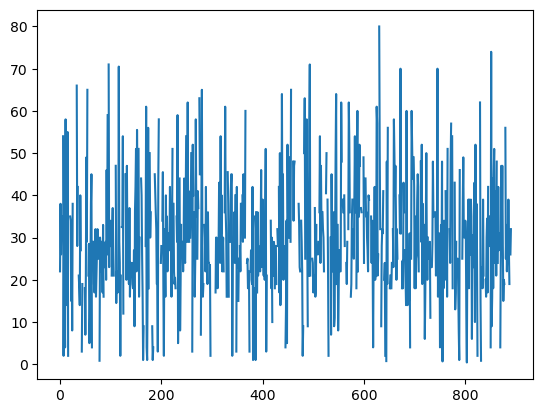

In [117]:
data["Age"].plot()

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: ylabel='Frequency'>

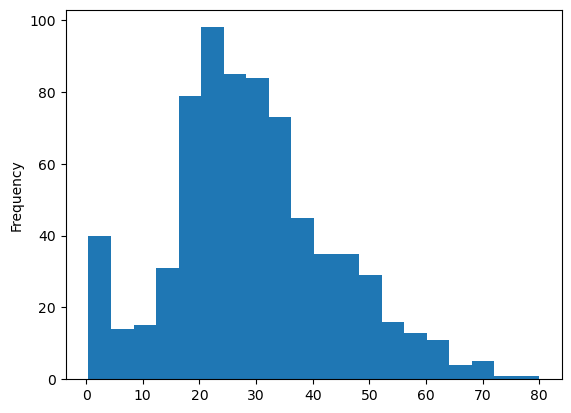

In [123]:
data["Age"].plot.hist(bins=20)

<Axes: xlabel='Sex'>

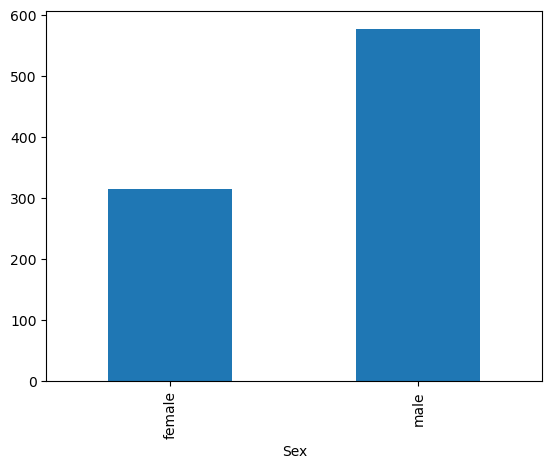

In [125]:
data.groupby("Sex").size().plot.bar()

<Axes: xlabel='Sex'>

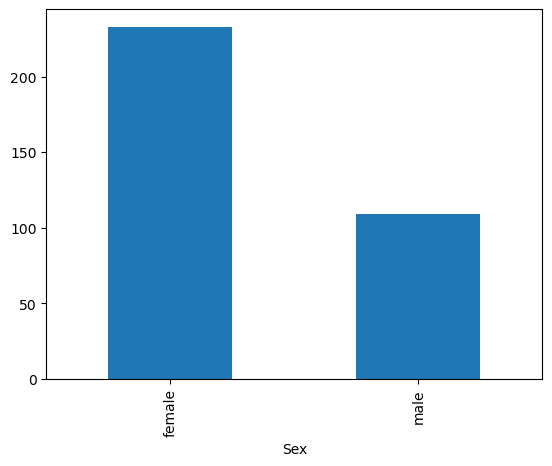

In [127]:
data.groupby("Sex")["Survived"].sum().plot.bar()

<Axes: title={'center': 'Proporción de pasajeros masculinos / femeninos'}, ylabel='Total'>

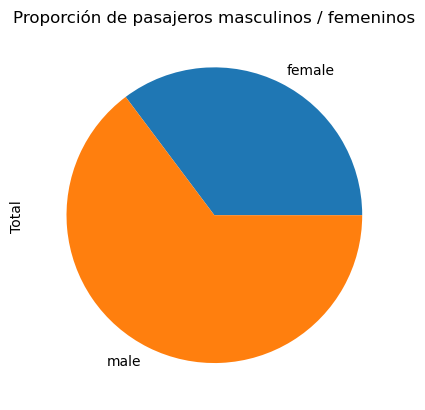

In [131]:
data.groupby("Sex").size().plot.pie(title="Proporción de pasajeros masculinos / femeninos", label="Total")

In [133]:
arr = np.random.randint(1,100,25)
df = pd.DataFrame(arr.reshape(5,5))
df.columns=["Audi", "Citroen", "Fiat", "Renault", "Mercedes"]
df.index=[2000,2004,2008,2012,2016]

In [135]:
df

Audi  Citroen  Fiat  Renault  Mercedes
2000    13       66     4       69        23
2004    23        8    55       92        13
2008    91       26    58       12        41
2012    26        7    37       41        48
2016    82        1    12        3        45

<Axes: >

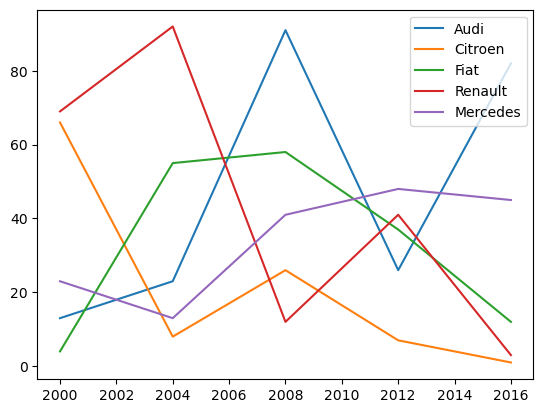

In [137]:
df.plot()

## Missing Values

In [140]:
df1 = pd.DataFrame({"Fiat":[100,200,300,150,300], "Renault":[300,240,np.nan,300,400], "VW":[400,100,200,250,400],})

In [142]:
df1

Fiat  Renault   VW
0   100    300.0  400
1   200    240.0  100
2   300      NaN  200
3   150    300.0  250
4   300    400.0  400

In [144]:
df1["Renault"]+df1["Fiat"]

0    400.0
1    440.0
2      NaN
3    450.0
4    700.0
dtype: float64

In [146]:
df1["Fiat"].add(df1["Renault"], fill_value=0)

0    400.0
1    440.0
2    300.0
3    450.0
4    700.0
dtype: float64

In [152]:
df1.mean(skipna=False) # Raro pero se puede hacer

Fiat       210.0
Renault      NaN
VW         270.0
dtype: float64

In [154]:
df1.isna()

Fiat  Renault     VW
0  False    False  False
1  False    False  False
2  False     True  False
3  False    False  False
4  False    False  False

In [156]:
df1.notna()

Fiat  Renault    VW
0  True     True  True
1  True     True  True
2  True    False  True
3  True     True  True
4  True     True  True

In [158]:
df1.isna().sum()

Fiat       0
Renault    1
VW         0
dtype: int64

In [160]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [162]:
data.dropna()

PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ...    ...   
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  female  47.0      1   
872                           Carlsson, Mr. Frans Olof    male  33.0      0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
889                              Behr, Mr. Karl Howell    male  26.0      0   

     Parch    Ticket     Fare        Cabin Embarked  
1        0  PC 17599  71.2833          C85        C  
3        0    113803  53.1000         C123        S  
6        0     17463  51.8625          E46        S  
10       1   PP 9549  16.7000           G6        S  
11       0    113783  26.5500         C103        S  
..     ...       ...      ...          ...      ...  
871      1     11751  52.5542          D35        S  
872      0       695   5.0000  B51 B53 B55        S  
879      1     11767  83.1583          C50        C  
887      0    112053  30.0000          B42        S  
889      0    111369  30.0000         C148        C  

[183 rows x 12 columns]

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [168]:
data["Age"].fillna(data["Age"].mean(), inplace=True)

In [170]:
data["Age"].mean()

29.69911764705882

<Axes: >

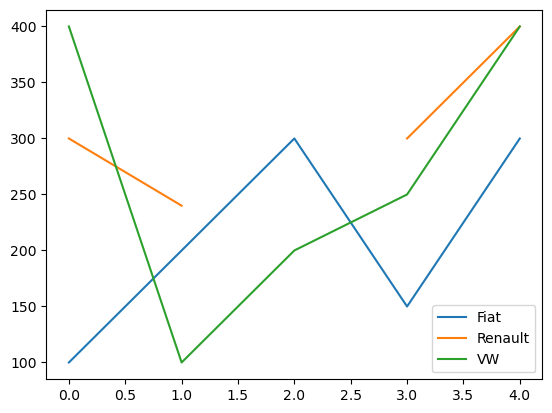

In [172]:
df1.plot()

<Axes: >

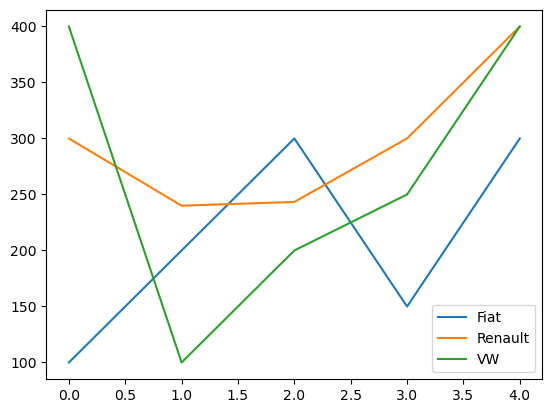

In [180]:
df1.interpolate(method='quadratic').plot()

## Strings

In [183]:
data["Name"].str.lower()

0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                        
886                                montvila, rev. juozas
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: Name, Length: 891, dtype: object

In [185]:
data["Name"].str.capitalize()

0                                Braund, mr. owen harris
1      Cumings, mrs. john bradley (florence briggs th...
2                                 Heikkinen, miss. laina
3           Futrelle, mrs. jacques heath (lily may peel)
4                               Allen, mr. william henry
                             ...                        
886                                Montvila, rev. juozas
887                         Graham, miss. margaret edith
888             Johnston, miss. catherine helen "carrie"
889                                Behr, mr. karl howell
890                                  Dooley, mr. patrick
Name: Name, Length: 891, dtype: object

In [187]:
data["Name"].str.title()

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [189]:
data["Name"].str.len()

0      23
1      51
2      22
3      44
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: Name, Length: 891, dtype: int64

In [193]:
data["Name"].str.count("Mr").sum()

650

In [197]:
data["Name"].str.contains("Andersson").sum()

9

In [199]:
data["Name"].str.startswith("John").any()

True

In [201]:
data["Cabin"].str.isalnum()

0       NaN
1      True
2       NaN
3      True
4       NaN
       ... 
886     NaN
887    True
888     NaN
889    True
890     NaN
Name: Cabin, Length: 891, dtype: object

In [203]:
data["Cabin"].str.isalpha()

0        NaN
1      False
2        NaN
3      False
4        NaN
       ...  
886      NaN
887    False
888      NaN
889    False
890      NaN
Name: Cabin, Length: 891, dtype: object

In [205]:
data["Name"].str[:5]

0      Braun
1      Cumin
2      Heikk
3      Futre
4      Allen
       ...  
886    Montv
887    Graha
888    Johns
889    Behr,
890    Doole
Name: Name, Length: 891, dtype: object

In [207]:
data["Name"].str[-10:]

0      wen Harris
1      gs Thayer)
2      iss. Laina
3       May Peel)
4      liam Henry
          ...    
886    ev. Juozas
887    aret Edith
888    n "Carrie"
889    arl Howell
890    r. Patrick
Name: Name, Length: 891, dtype: object

## Fechas / GoldPrice

In [211]:
gold = pd.read_csv("goldprice.csv")

In [215]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9771 entries, 0 to 9770
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9771 non-null   object 
 1   Price   9771 non-null   float64
 2   Open    9771 non-null   float64
 3   High    9771 non-null   float64
 4   Low     9771 non-null   float64
dtypes: float64(4), object(1)
memory usage: 381.8+ KB


In [217]:
gold

Date   Price     Open    High      Low
0     Aug 01, 2018  1216.6  1223.40  1223.4  1216.20
1     Jul 31, 2018  1223.7  1220.40  1228.1  1213.00
2     Jul 30, 2018  1221.3  1222.50  1223.9  1218.10
3     Jul 27, 2018  1222.2  1223.50  1226.8  1216.70
4     Jul 26, 2018  1225.3  1227.80  1227.8  1227.80
...            ...     ...      ...     ...      ...
9766  Jan 03, 1980   625.0   627.00   640.0   603.00
9767  Jan 02, 1980   575.5   562.50   577.0   558.00
9768  Dec 31, 1979   533.6   527.88   534.5   527.88
9769  Dec 28, 1979   517.8   516.00   517.8   510.40
9770  Dec 27, 1979   515.5   517.00   517.0   513.00

[9771 rows x 5 columns]

In [219]:
gold["Date"] = pd.to_datetime(gold["Date"])

In [221]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9771 entries, 0 to 9770
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9771 non-null   datetime64[ns]
 1   Price   9771 non-null   float64       
 2   Open    9771 non-null   float64       
 3   High    9771 non-null   float64       
 4   Low     9771 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 381.8 KB


## Operaciones con tipos de datos datetime64

In [228]:
gold["Date"].dt.year

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
9766    1980
9767    1980
9768    1979
9769    1979
9770    1979
Name: Date, Length: 9771, dtype: int32

In [230]:
gold.Date.min()

Timestamp('1979-12-27 00:00:00')

In [232]:
gold.Date.max()

Timestamp('2018-08-01 00:00:00')

In [234]:
gold.Date.max()-gold.Date.min()

Timedelta('14097 days 00:00:00')

In [236]:
gold

Date   Price     Open    High      Low
0    2018-08-01  1216.6  1223.40  1223.4  1216.20
1    2018-07-31  1223.7  1220.40  1228.1  1213.00
2    2018-07-30  1221.3  1222.50  1223.9  1218.10
3    2018-07-27  1222.2  1223.50  1226.8  1216.70
4    2018-07-26  1225.3  1227.80  1227.8  1227.80
...         ...     ...      ...     ...      ...
9766 1980-01-03   625.0   627.00   640.0   603.00
9767 1980-01-02   575.5   562.50   577.0   558.00
9768 1979-12-31   533.6   527.88   534.5   527.88
9769 1979-12-28   517.8   516.00   517.8   510.40
9770 1979-12-27   515.5   517.00   517.0   513.00

[9771 rows x 5 columns]

In [238]:
gold.set_index("Date", inplace=True)

In [240]:
gold

Price     Open    High      Low
Date                                        
2018-08-01  1216.6  1223.40  1223.4  1216.20
2018-07-31  1223.7  1220.40  1228.1  1213.00
2018-07-30  1221.3  1222.50  1223.9  1218.10
2018-07-27  1222.2  1223.50  1226.8  1216.70
2018-07-26  1225.3  1227.80  1227.8  1227.80
...            ...      ...     ...      ...
1980-01-03   625.0   627.00   640.0   603.00
1980-01-02   575.5   562.50   577.0   558.00
1979-12-31   533.6   527.88   534.5   527.88
1979-12-28   517.8   516.00   517.8   510.40
1979-12-27   515.5   517.00   517.0   513.00

[9771 rows x 4 columns]

In [242]:
gold.loc["2016"]

Price    Open     High     Low
Date                                        
2016-12-30  1150.00  1162.0  1162.00  1151.0
2016-12-29  1156.40  1143.8  1158.80  1143.6
2016-12-28  1139.40  1141.2  1141.20  1138.0
2016-12-27  1137.30  1134.3  1142.20  1134.3
2016-12-26  1134.55  1135.0  1136.05  1134.0
...             ...     ...      ...     ...
2016-01-08  1097.80  1111.1  1111.10  1093.0
2016-01-07  1107.70  1091.6  1109.40  1091.6
2016-01-06  1091.90  1081.6  1093.70  1081.6
2016-01-05  1078.40  1075.6  1081.50  1075.3
2016-01-04  1075.10  1063.4  1082.50  1063.2

[265 rows x 4 columns]

In [244]:
gold[(gold.index >="2016-01-01") & (gold.index <= "2016-01-31")]

Price    Open    High     Low
Date                                      
2016-01-29  1116.4  1114.4  1118.6  1108.8
2016-01-28  1115.6  1125.4  1125.7  1109.8
2016-01-27  1116.1  1117.8  1117.8  1115.8
2016-01-26  1121.7  1115.1  1115.9  1114.3
2016-01-25  1106.2  1099.3  1109.3  1099.3
2016-01-22  1097.2  1098.0  1103.2  1098.0
2016-01-21  1099.1  1103.6  1103.6  1094.1
2016-01-20  1107.1  1099.8  1109.8  1099.8
2016-01-19  1089.9  1089.8  1094.4  1084.9
2016-01-18  1088.5  1090.2  1093.3  1087.4
2016-01-17  1090.3  1088.6  1090.8  1088.6
2016-01-15  1091.5  1085.0  1095.8  1081.8
2016-01-14  1073.9  1091.5  1091.5  1073.7
2016-01-13  1087.5  1081.5  1093.9  1081.5
2016-01-12  1085.6  1093.8  1098.5  1084.0
2016-01-11  1096.5  1105.7  1107.9  1096.5
2016-01-08  1097.8  1111.1  1111.1  1093.0
2016-01-07  1107.7  1091.6  1109.4  1091.6
2016-01-06  1091.9  1081.6  1093.7  1081.6
2016-01-05  1078.4  1075.6  1081.5  1075.3
2016-01-04  1075.1  1063.4  1082.5  1063.2

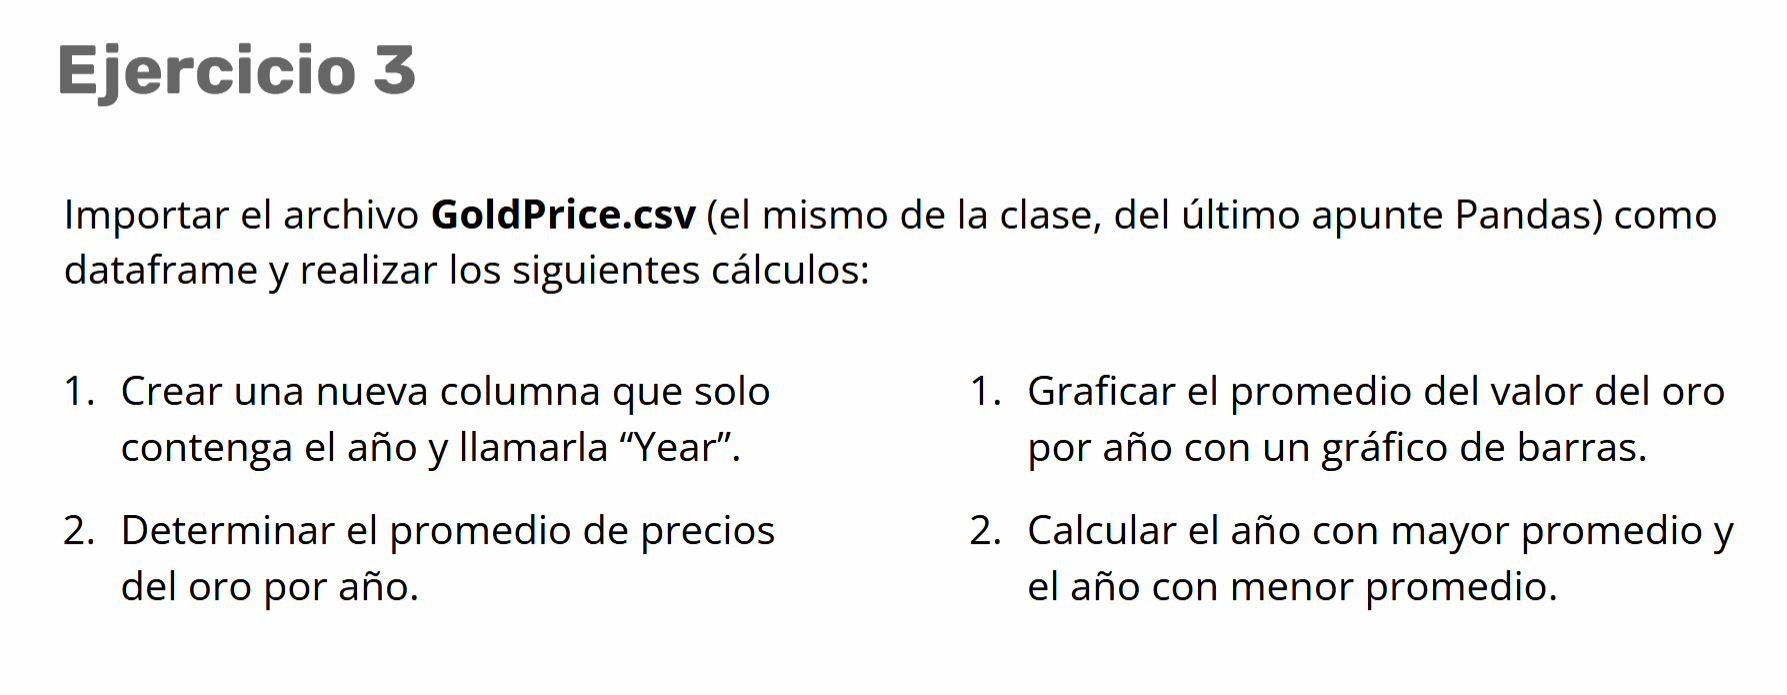

In [251]:
gold

Price     Open    High      Low
Date                                        
2018-08-01  1216.6  1223.40  1223.4  1216.20
2018-07-31  1223.7  1220.40  1228.1  1213.00
2018-07-30  1221.3  1222.50  1223.9  1218.10
2018-07-27  1222.2  1223.50  1226.8  1216.70
2018-07-26  1225.3  1227.80  1227.8  1227.80
...            ...      ...     ...      ...
1980-01-03   625.0   627.00   640.0   603.00
1980-01-02   575.5   562.50   577.0   558.00
1979-12-31   533.6   527.88   534.5   527.88
1979-12-28   517.8   516.00   517.8   510.40
1979-12-27   515.5   517.00   517.0   513.00

[9771 rows x 4 columns]

In [255]:
gold.reset_index(inplace=True)

In [257]:
gold

Date   Price     Open    High      Low
0    2018-08-01  1216.6  1223.40  1223.4  1216.20
1    2018-07-31  1223.7  1220.40  1228.1  1213.00
2    2018-07-30  1221.3  1222.50  1223.9  1218.10
3    2018-07-27  1222.2  1223.50  1226.8  1216.70
4    2018-07-26  1225.3  1227.80  1227.8  1227.80
...         ...     ...      ...     ...      ...
9766 1980-01-03   625.0   627.00   640.0   603.00
9767 1980-01-02   575.5   562.50   577.0   558.00
9768 1979-12-31   533.6   527.88   534.5   527.88
9769 1979-12-28   517.8   516.00   517.8   510.40
9770 1979-12-27   515.5   517.00   517.0   513.00

[9771 rows x 5 columns]

In [259]:
gold["Year"] = gold["Date"].dt.year

In [261]:
gold

Date   Price     Open    High      Low  Year
0    2018-08-01  1216.6  1223.40  1223.4  1216.20  2018
1    2018-07-31  1223.7  1220.40  1228.1  1213.00  2018
2    2018-07-30  1221.3  1222.50  1223.9  1218.10  2018
3    2018-07-27  1222.2  1223.50  1226.8  1216.70  2018
4    2018-07-26  1225.3  1227.80  1227.8  1227.80  2018
...         ...     ...      ...     ...      ...   ...
9766 1980-01-03   625.0   627.00   640.0   603.00  1980
9767 1980-01-02   575.5   562.50   577.0   558.00  1980
9768 1979-12-31   533.6   527.88   534.5   527.88  1979
9769 1979-12-28   517.8   516.00   517.8   510.40  1979
9770 1979-12-27   515.5   517.00   517.0   513.00  1979

[9771 rows x 6 columns]

In [263]:
# Determinar el promedio de precios por año

gold.groupby("Year")["Price"].mean()

Year
1979     522.300000
1980     611.959921
1981     458.490514
1982     375.563745
1983     423.452964
1984     360.656522
1985     317.517460
1986     368.330677
1987     447.056522
1988     437.059524
1989     382.072222
1990     383.798016
1991     362.462698
1992     343.773333
1993     360.171260
1994     384.077689
1995     384.484585
1996     387.891304
1997     331.435317
1998     294.214343
1999     278.890000
2000     278.885141
2001     271.068826
2002     310.479032
2003     363.620884
2004     409.579839
2005     445.112749
2006     603.977381
2007     697.005159
2008     870.982609
2009     974.149206
2010    1227.501984
2011    1572.135714
2012    1669.157143
2013    1407.275781
2014    1265.730534
2015    1160.310227
2016    1248.176604
2017    1257.635303
2018    1305.352258
Name: Price, dtype: float64

In [265]:
gold.groupby("Year").Price.mean()

Year
1979     522.300000
1980     611.959921
1981     458.490514
1982     375.563745
1983     423.452964
1984     360.656522
1985     317.517460
1986     368.330677
1987     447.056522
1988     437.059524
1989     382.072222
1990     383.798016
1991     362.462698
1992     343.773333
1993     360.171260
1994     384.077689
1995     384.484585
1996     387.891304
1997     331.435317
1998     294.214343
1999     278.890000
2000     278.885141
2001     271.068826
2002     310.479032
2003     363.620884
2004     409.579839
2005     445.112749
2006     603.977381
2007     697.005159
2008     870.982609
2009     974.149206
2010    1227.501984
2011    1572.135714
2012    1669.157143
2013    1407.275781
2014    1265.730534
2015    1160.310227
2016    1248.176604
2017    1257.635303
2018    1305.352258
Name: Price, dtype: float64

In [273]:
gold[["Year", "Price", "Open"]].groupby("Year").mean()

Price         Open
Year                          
1979   522.300000   520.293333
1980   611.959921   613.400397
1981   458.490514   459.038735
1982   375.563745   375.357769
1983   423.452964   423.716601
1984   360.656522   360.593676
1985   317.517460   317.451984
1986   368.330677   368.270518
1987   447.056522   447.150988
1988   437.059524   437.184127
1989   382.072222   381.876984
1990   383.798016   383.827778
1991   362.462698   362.802778
1992   343.773333   343.874510
1993   360.171260   360.271260
1994   384.077689   384.259363
1995   384.484585   384.553360
1996   387.891304   387.987352
1997   331.435317   331.612302
1998   294.214343   294.321116
1999   278.890000   279.009600
2000   278.885141   278.853012
2001   271.068826   270.969231
2002   310.479032   310.312903
2003   363.620884   363.479518
2004   409.579839   409.645565
2005   445.112749   444.941434
2006   603.977381   604.033730
2007   697.005159   696.696032
2008   870.982609   872.144269
2009   974.149206   974.072222
2010  1227.501984  1226.680159
2011  1572.135714  1572.915476
2012  1669.157143  1668.988889
2013  1407.275781  1409.304297
2014  1265.730534  1265.525954
2015  1160.310227  1160.870076
2016  1248.176604  1248.005660
2017  1257.635303  1257.263333
2018  1305.352258  1305.656774

<Axes: ylabel='Year'>

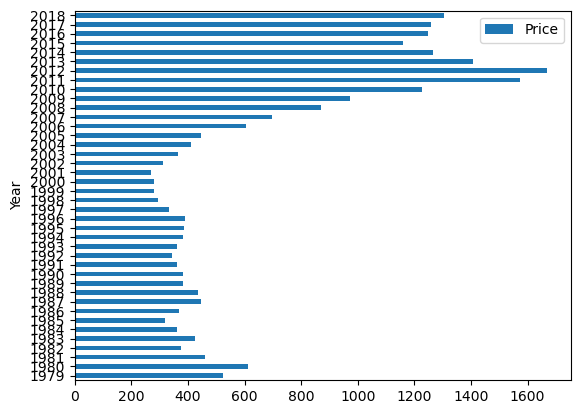

In [277]:
gold[["Year", "Price"]].groupby("Year").mean().plot.barh()

In [287]:
# Calcular el año con myor promedio y con menor promedio


prom_max = float(gold[["Year", "Price"]].groupby("Year").mean().max())
anio_max = int(gold[["Year", "Price"]].groupby("Year").mean().idxmax())
prom_min = float(gold[["Year", "Price"]].groupby("Year").mean().min())
anio_min = int(gold[["Year", "Price"]].groupby("Year").mean().idxmin())

C:\Users\Norman Beltran\AppData\Local\Temp\ipykernel_2548\1289958542.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  prom_max = float(gold[["Year", "Price"]].groupby("Year").mean().max())
C:\Users\Norman Beltran\AppData\Local\Temp\ipykernel_2548\1289958542.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  anio_max = int(gold[["Year", "Price"]].groupby("Year").mean().idxmax())
C:\Users\Norman Beltran\AppData\Local\Temp\ipykernel_2548\1289958542.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  prom_min = float(gold[["Year", "Price"]].groupby("Year").mean().min())
C:\Users\Norman Beltran\AppData\Local\Temp\ipykernel_2548\1289958542.py:7: FutureWarning: Calling int on a single element Series i

In [289]:
print(f"Mayor promedio fue {prom_max} {anio_max}")
print(f"Menor promedio fue {prom_min} {anio_min}")

Mayor promedio fue 1669.1571428571428 2012
Menor promedio fue 271.0688259109312 2001
